# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
for a in x_train,y_train,x_test,y_test:
    print(a.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
x_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

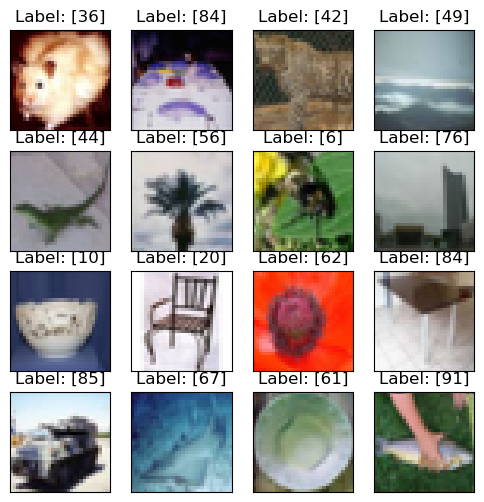

In [5]:
# Selecting 16 random indices
random_indices = np.random.choice(len(x_train.data), 16, replace=False)

# Creating a 4x4 grid plot
fig, axes = plt.subplots(4, 4, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {y_train[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [37]:
from tensorflow.keras.utils import to_categorical
x_train_norm = np.divide(x_train,255.0)
y_train_cat = to_categorical(y_train.flatten())
y_train_cat.shape

(50000, 100)

In [38]:
from sklearn.model_selection import train_test_split
xtn_train, xtn_test, ytc_train, ytc_test = train_test_split(
    x_train_norm, 
    y_train_cat,
    test_size=0.2, # 20% of the data is used for validation
    random_state=142
)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [40]:
# Baseline model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
# Create model
model = Sequential()
# Hidden layers
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), 
            padding="same", activation='relu'
            ))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
model.add(Flatten())  #Flatten before Dense layers
model.add(Dense(100, activation='relu'))
# Output layer
model.add(Dense(100, activation='softmax'))

print(model.summary())

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │       819,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │        10,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 830,296 (3.17 MB)

 Trainable params: 830,296 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

None


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Cross-entropy. It calculates differences between probability distributions and is suitable for multi-class classification.
- <b>Optimizer:</b> Adam. It generally requires a smaller learning rate vs. SGD.

In [42]:
from keras import optimizers
model.compile(optimizer=optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', metrics=['accuracy','AUC'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.

A higher number of epochs can allow the model to take on different directions in recognizing diverse patterns, but it can also lead to overfitting or sudden increase in loss. For this medium-sized dataset of 60,000 images, I chose 15 epochs to observe how the model performs at start and allow some lengths for it to level off (hopefully).

- Use a batch size of 32.
- Use the validation set for validation.

In [43]:
history = model.fit(
    xtn_train, # Training data
    ytc_train, # Training labels
    epochs=15, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_data=(xtn_test, ytc_test)
)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - AUC: 0.6003 - accuracy: 0.0211 - loss: 4.5064 - val_AUC: 0.7417 - val_accuracy: 0.0477 - val_loss: 4.1790
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - AUC: 0.7478 - accuracy: 0.0549 - loss: 4.1430 - val_AUC: 0.7645 - val_accuracy: 0.0698 - val_loss: 4.0779
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - AUC: 0.7722 - accuracy: 0.0768 - loss: 4.0257 - val_AUC: 0.7763 - val_accuracy: 0.0760 - val_loss: 4.0235
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - AUC: 0.7839 - accuracy: 0.0820 - loss: 3.9634 - val_AUC: 0.7508 - val_accuracy: 0.0685 - val_loss: 4.1457
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - AUC: 0.7903 - accuracy: 0.0940 - loss: 3.9149 - val_AUC: 0.7727 - val_accuracy: 0.0789 - val_loss: 4.0364
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - AUC: 0.7991 - accuracy: 0.0999 - loss: 3.8706 - val_AUC: 0.7838 - val_accuracy: 0.0903 - val_loss: 3.9684
Epoch 7/15
1250/

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.0993
- <b>Other metric:</b> AUC
- <b>Reason for selection:</b> It evaluates all the operational points of the model.
- <b>Interpretation of metric value:</b> 0.775. AUC gives the area under the curve of precision vs recall. A high AUC would mean many true positives and few false negatives. The model is only marginally (>0.5) good at discriminating true positives.

In [44]:
model.evaluate(xtn_test, ytc_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - AUC: 0.7745 - accuracy: 0.0979 - loss: 4.0765


[4.093891143798828, 0.09939999878406525, 0.7754553556442261]

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

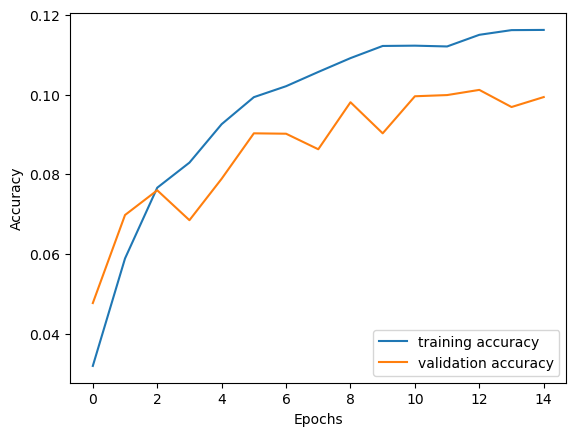

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [85]:
samples.shape

(32, 32, 3)

In [140]:
# import tensorflow as tf
# predictions_tf = model(xtn_test)
# tf.reduce_sum(predictions_tf[0])
# predictions_tf[0]

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([2.6981048e-11, 2.4882170e-09, 4.0083772e-09, 5.3309344e-07,
       1.2842964e-08, 9.0698983e-08, 3.4314853e-12, 5.2299585e-11,
       2.4611255e-08, 1.7081245e-04, 2.5365877e-08, 6.0549805e-09,
       6.5160903e-06, 5.2925444e-08, 1.9169173e-11, 1.8912019e-07,
       4.8419179e-06, 5.9700753e-08, 4.5623448e-08, 9.2494389e-08,
       1.8438800e-06, 9.2270788e-08, 3.7622499e-08, 5.9023178e-06,
       1.2860540e-08, 9.1399180e-08, 4.5666279e-12, 5.1965041e-09,
       1.1902792e-06, 2.5944478e-09, 9.2089863e-08, 5.6894135e-07,
       4.4156194e-09, 5.6589806e-07, 3.6653636e-10, 2.7400908e-08,
       2.0651399e-08, 6.2159228e-10, 1.0929139e-06, 4.0476845e-08,
       4.8354872e-07, 4.1863256e-11, 6.1763128e-09, 5.0651892e-09,
       1.6138117e-08, 3.2186687e-11, 5.7379175e-08, 2.9638633e-12,
       7.7637452e-11, 1.6327927e-10, 7.6717114e-08, 1.1378142e-09,
       1.3432329e-12, 2.9295472e-11, 3.0362798e-12, 3.4133891e-09,
       6.69687

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


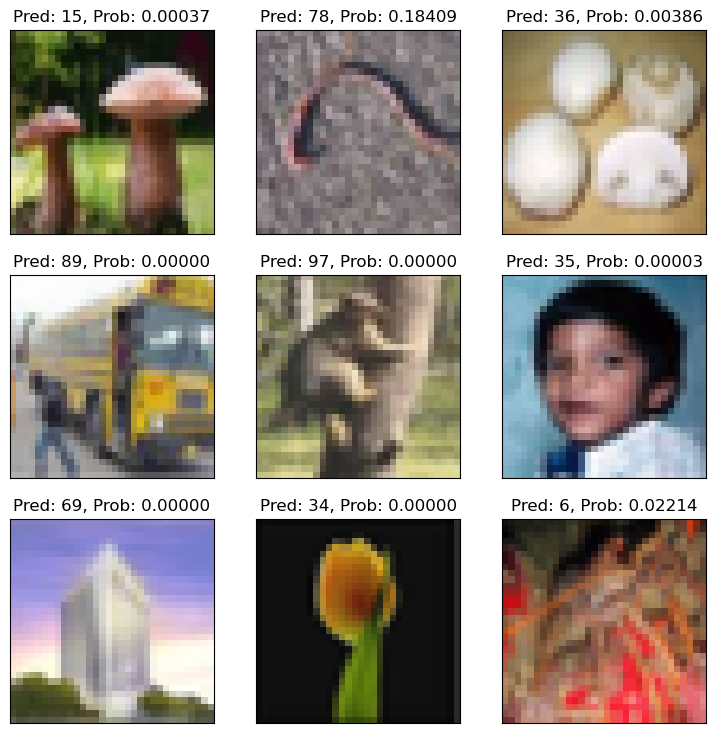

In [127]:
# Get the predictions for the test data
predictions = model.predict(xtn_test)
predictions_tf = model(xtn_test)

# Get the index of the largest probability (i.e. the predicted class)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(ytc_test, axis=1)
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Get the misclassified samples themselves
misclassified_samples = xtn_test[misclassified_indices]
misclassified_labels = np.argmax(ytc_test[misclassified_indices], axis=1)

# Pick 9 random misclassified samples
random_indices = np.random.choice(len(misclassified_indices), 9, replace=False)

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(misclassified_samples[random_indices[i]].reshape(32,32,3), interpolation='nearest')
    ax.set_title(f"Pred: {predicted_classes[misclassified_indices[random_indices[i]]]}, Prob: {predictions_tf[random_indices[i]][misclassified_labels[random_indices[i]]]:.5f}")
    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()


In [143]:
len(misclassified_indices)

6450

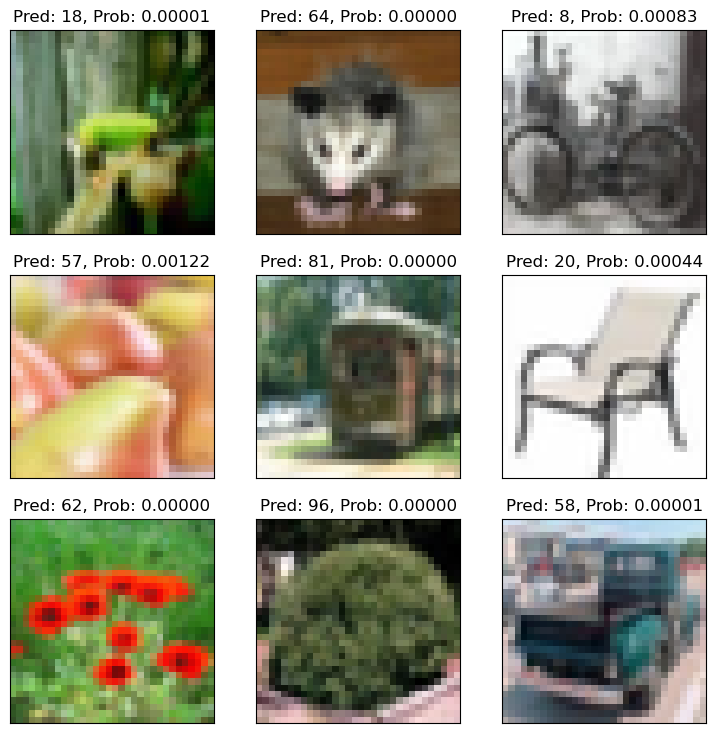

In [128]:
# Pick 9 random correctly classified samples
correctly_classified_indices = np.where(predicted_classes == true_classes)[0]

# Get the correctly classified samples themselves
correctly_classified_samples = xtn_test[correctly_classified_indices]
correctly_classified_labels = np.argmax(ytc_test[correctly_classified_indices], axis=1)

random_indices = np.random.choice(len(correctly_classified_indices), 9, replace=False)

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(correctly_classified_samples[random_indices[i]].reshape(32,32,3), interpolation='nearest')
    ax.set_title(f"Pred: {predicted_classes[correctly_classified_indices[random_indices[i]]]}, Prob: {predictions_tf[random_indices[i]][correctly_classified_labels[random_indices[i]]]:.5f}")
    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [66]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
# Create edge detection kernel
# def my_kernel(shape=(5, 5, 3, 3), dtype=None):
#     array = np.zeros(shape=shape, dtype="float32")
#     array[:, :, 0, 0] = -1
#     array[:, :, 0, 1] = -1
#     array[:, :, 0, 2] = -1
#     array[:, :, 1, 0] = -1
#     array[:, :, 1, 1] = 8
#     array[:, :, 1, 2] = -1
#     array[:, :, 2, 0] = -1
#     array[:, :, 2, 1] = -1
#     array[:, :, 2, 2] = -1
#     return array
# Create model
model = Sequential([
    Input(shape=(32,32,3)),
    # Hidden layers
    Conv2D(filters=32, kernel_size=(3, 3), padding="same",
                activation='relu'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), padding="same",
                activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2,2), strides=2, padding="same"),
    Flatten(),  #Flatten before Dense layers
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    # Output layer
    Dense(100, activation='softmax')
    ])
print(model.summary())

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,201,348 (8.40 MB)

 Trainable params: 2,200,196 (8.39 MB)

 Non-trainable params: 1,152 (4.50 KB)

None


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [67]:
from keras import optimizers
model.compile(optimizer=optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', metrics=['accuracy','AUC'])
history = model.fit(
    xtn_train, # Training data
    ytc_train, # Training labels
    epochs=15, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_data=(xtn_test, ytc_test)
)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 103s 77ms/step - AUC: 0.7348 - accuracy: 0.0799 - loss: 4.2619 - val_AUC: 0.8192 - val_accuracy: 0.1608 - val_loss: 3.7046
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 95s 76ms/step - AUC: 0.8570 - accuracy: 0.1769 - loss: 3.4010 - val_AUC: 0.8413 - val_accuracy: 0.2060 - val_loss: 3.4485
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 78ms/step - AUC: 0.8846 - accuracy: 0.2419 - loss: 3.0772 - val_AUC: 0.8693 - val_accuracy: 0.2362 - val_loss: 3.1786
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 105s 84ms/step - AUC: 0.9064 - accuracy: 0.2835 - loss: 2.8120 - val_AUC: 0.8591 - val_accuracy: 0.2584 - val_loss: 3.2853
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 112s 89ms/step - AUC: 0.9198 - accuracy: 0.3282 - loss: 2.6011 - val_AUC: 0.8659 - val_accuracy: 0.2716 - val_loss: 3.2286
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 107s 86ms/step - AUC: 0.9252 - accuracy: 0.3514 - loss: 2.4948 - val_AUC: 0.8915 - val_accuracy: 0.3150 - val_loss: 2.9058
Epoch 7/15
1

In [68]:
model.evaluate(xtn_test, ytc_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - AUC: 0.8657 - accuracy: 0.3538 - loss: 3.1281


[3.0919089317321777, 0.35499998927116394, 0.8676512241363525]

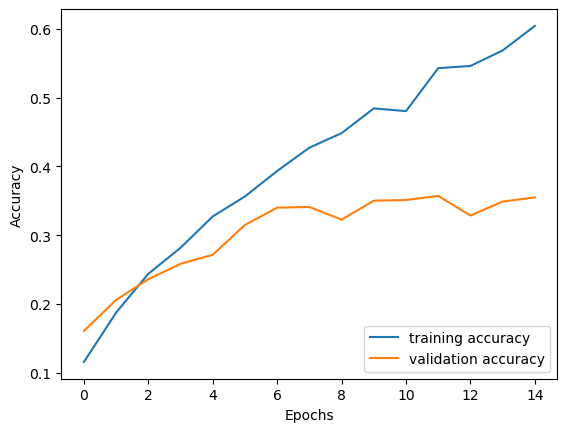

In [69]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 

Both accuracy and AUC both improved to 0.355 and 0.867 accordingly.

However, there's overfitting as indicated by the difference between training and validation accuracies, and the diversion of the loss curves.

- Why do you think this is?

Few reasons: 

Added extra layers to capture pattern complexity; increased kernel size to capture image details; included batch normalization after RELU to ease learning when passing to a new layer.

However, it seems that adding these extra features do not necessarily help the model to learn to generalize. It becomes more focused on the training set, but not about to improve accuracy on the validation set. While Dropout was incorporated, it did not completely reduce overfitting.

- Do you think there is room for further improvement? Why or why not?

Yes, the accuracy is still very low.

The images may be further examined (colours, edges, diversity, etc.) to determine what convolution layers, kernel/filter sizes may be most sensible to use.

Another method may be to set up GridSearch to test out different parameters, e.g. number of filters and dropout rates.

Perhaps Dropout can be implemented at different layers (vs. now) to better prevent overfitting.

- What other techniques might you try in the future?

Use pretrained models that are trained with similar kinds of images might help to pick up similar features.

Use early stop to prevent overfitting.

Use specific kernels with visual effects to detect edges and sharpen images for trainning - but not sure if that would help (I have tried but without much success).


- Your answer should be no more than 200 words.


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.